In [641]:
!pwd

/Users/hontiktse/LinearRL/google-research/minigrid_basics


In [642]:
from os.path import join
import pickle
import numpy as np
import matplotlib.pyplot as plt
from envs import maxent_mon_minigrid
from examples.rep_utils import construct_value_pred_map
import gin
import os
import gym

In [643]:
def load_data(path, name):
    with open(join(path, name), "rb") as f:
        return pickle.load(f)

In [644]:
def load_setting(path, rep, i_eigen, r_shaped_weight, lr, n_seeds=20):

    
    datas = []
    for seed in range(1, n_seeds + 1):

        # construct file name
        exp_name = [rep, i_eigen, r_shaped_weight, lr, seed]
        exp_name = [str(x) for x in exp_name]
        exp_name = '-'.join(exp_name) 

        with open(join(path, exp_name + ".pkl"), "rb") as f:
            data = pickle.load(f)

        datas.append(data['perf'])

    # plot_mean_and_conf_interval(data['t'], datas, label=exp_name)
    return data['t'], datas, exp_name

In [645]:
def load_fit_setting(path, rep, n_episodes, i_eigen, r_shaped_weight, lr, n_seeds=20):

    
    datas = []
    for seed in range(1, n_seeds + 1):

        # construct file name
        exp_name = [rep, n_episodes, i_eigen, r_shaped_weight, lr, seed]
        exp_name = [str(x) for x in exp_name]
        exp_name = '-'.join(exp_name) 

        with open(join(path, exp_name + ".pkl"), "rb") as f:
            data = pickle.load(f)

        datas.append(data['perf'])

    # plot_mean_and_conf_interval(data['t'], datas, label=exp_name)
    return data['t'], datas, exp_name

In [646]:
def plot_mean_and_conf_interval(x, y, label, color, alpha):

    """
    x: x axis
    y: data, each row contains one trial
    """
    y_mean = np.mean(y, axis=0)
    y_std = np.std(y, axis=0)

    n_trials = np.array(y).shape[0]

    y_interval = 1.96 / np.sqrt(n_trials) * y_std

    plt.plot(x, y_mean, label=label, color=color, alpha=alpha)
    plt.fill_between(x, y_mean - y_interval, y_mean + y_interval, alpha=0.05, color=color)

In [647]:
def construct_alphas(settings):
        n = len(settings)
        alphas = np.linspace(0.1, 1, n + 1)[1:]
        return alphas

# Closed Form Reward Shaping

### Change Env Name for all envs

In [461]:
env_name = "MiniGrid-MaxEntEmpty-v0"
path = join(".", "experiments", "reward_shaping", env_name)

In [462]:
# # baseline
# lrs = [0.1, 0.3, 1.0]
# colors = ["red", "g", "b"]
# seeds = range(1, 20 + 1)

# for lr, c in zip(lrs, colors):
#     data_for_all_seeds = []
#     for seed in seeds:
#         name = f"baseline-0-0.0-{lr}-{seed}.pkl"
#         data = load_data(path, name)
#         data_for_all_seeds.append(data['perf'])   # get performance for all seeds

#     plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

# plt.legend()
# plt.xlabel("Number of Timesteps")
# plt.ylabel("Undiscounted Return")

# # best learning rate: 0.3

In [463]:
# # SR: best learning rate for each r-shaped-weight
# r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
# lrs = [0.1, 0.3, 1.0]
# colors = ["red", "g", "b"]
# seeds = range(1, 20 + 1)

# for r_w in r_shaped_weights:
#     for lr, c in zip(lrs, colors):
#         data_for_all_seeds = []
#         for seed in seeds:
#             name = f"SR-0-{r_w}-{lr}-{seed}.pkl"
#             data = load_data(path, name)
#             data_for_all_seeds.append(data['perf'])   # get performance for all seeds
    
#         plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

#     plt.legend()
#     plt.xlabel("Number of Timesteps")
#     plt.ylabel("Undiscounted Return")
#     plt.show()

# # best learning rate: 1 for all r_shaped_weights

In [464]:
# # SR: best r_shaped_weight
# r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
# colors = ['r', 'g', 'b', 'pink']
# for r_w, c in zip(r_shaped_weights,colors):
#     data_for_all_seeds = []
#     for seed in seeds:
#         name = f"SR-0-{r_w}-{1.0}-{seed}.pkl"
#         data = load_data(path, name)
#         data_for_all_seeds.append(data['perf'])   # get performance for all seeds

#     plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

# plt.legend()
# plt.xlabel("Number of Timesteps")
# plt.ylabel("Undiscounted Return")
# plt.xlim([0, 4000])
# plt.show()

# # SR best setting: r_shaped_weight 1.0, lr 1.0

In [465]:
# # MER: best lr for each r_shaped_weight
# r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
# lrs = [0.1, 0.3, 1.0]
# colors = ["red", "g", "b"]
# seeds = range(1, 20 + 1)

# for r_w in r_shaped_weights:
#     for lr, c in zip(lrs, colors):
#         data_for_all_seeds = []
#         for seed in seeds:
#             name = f"MER-0-{r_w}-{lr}-{seed}.pkl"
#             data = load_data(path, name)
#             data_for_all_seeds.append(data['perf'])   # get performance for all seeds
    
#         plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

#     plt.legend()
#     plt.xlabel("Number of Timesteps")
#     plt.ylabel("Undiscounted Return")
#     plt.show()

# # best learning rate: 1 for all r_shaped_weights

In [466]:
# # MER: best r_shaped_weight
# r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
# colors = ['r', 'g', 'b', 'pink']
# for r_w, c in zip(r_shaped_weights,colors):
#     data_for_all_seeds = []
#     for seed in seeds:
#         name = f"MER-0-{r_w}-{1.0}-{seed}.pkl"
#         data = load_data(path, name)
#         data_for_all_seeds.append(data['perf'])   # get performance for all seeds

#     plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

# plt.legend()
# plt.xlabel("Number of Timesteps")
# plt.ylabel("Undiscounted Return")
# plt.xlim([0, 4000])
# plt.show()

# # MER best: r_shaped_weight 1.0, lr 1.0

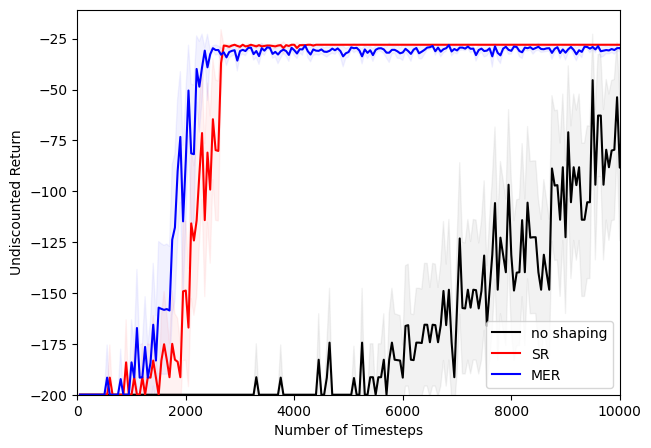

In [470]:
### plot best scenario
plt.figure(figsize=(7, 5))

# baseline
x, y, name = load_setting(path, "baseline", 0, 0.0, 0.3)
plot_mean_and_conf_interval(x, y, label='no shaping', color="black", alpha=1)

# SR best
x, y, name = load_setting(path, "SR", 0, 1.0, 1.0)
plot_mean_and_conf_interval(x, y, label="SR", color="red", alpha=1)

# MER best
x, y, name = load_setting(path, "MER", 0, 1.0, 1.0)
plot_mean_and_conf_interval(x, y, label="MER", color="blue", alpha=1)

plt.legend(loc='lower right')
plt.xlim([0, 10000])
plt.ylim([-200, None])
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")
plt.savefig("plots/reward_shaping/Empty.png", dpi=300)

### MiniGrid-MaxEntEmpty2-v0

In [471]:
env_name = "MiniGrid-MaxEntEmpty2-v0"
path = join(".", "experiments", "reward_shaping", env_name)

In [472]:
# # baseline
# lrs = [0.1, 0.3, 1.0]
# colors = ["red", "g", "b"]
# seeds = range(1, 20 + 1)

# for lr, c in zip(lrs, colors):
#     data_for_all_seeds = []
#     for seed in seeds:
#         name = f"baseline-0-0.0-{lr}-{seed}.pkl"
#         data = load_data(path, name)
#         data_for_all_seeds.append(data['perf'])   # get performance for all seeds

#     plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

# plt.legend()
# plt.xlabel("Number of Timesteps")
# plt.ylabel("Undiscounted Return")

# # best learning rate: 1.0

In [473]:
# # SR: best learning rate for each r-shaped-weight
# r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
# lrs = [0.1, 0.3, 1.0]
# colors = ["red", "g", "b"]
# seeds = range(1, 20 + 1)

# for r_w in r_shaped_weights:
#     for lr, c in zip(lrs, colors):
#         data_for_all_seeds = []
#         for seed in seeds:
#             name = f"SR-0-{r_w}-{lr}-{seed}.pkl"
#             data = load_data(path, name)
#             data_for_all_seeds.append(data['perf'])   # get performance for all seeds
    
#         plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

#     plt.legend()
#     plt.xlabel("Number of Timesteps")
#     plt.ylabel("Undiscounted Return")
#     plt.show()

# # best learning rate: 1 for all r_shaped_weights

In [474]:
# # SR: best r_shaped_weight
# r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
# colors = ['r', 'g', 'b', 'pink']
# for r_w, c in zip(r_shaped_weights,colors):
#     data_for_all_seeds = []
#     for seed in seeds:
#         name = f"SR-0-{r_w}-{1.0}-{seed}.pkl"
#         data = load_data(path, name)
#         data_for_all_seeds.append(data['perf'])   # get performance for all seeds

#     plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

# plt.legend()
# plt.xlabel("Number of Timesteps")
# plt.ylabel("Undiscounted Return")
# plt.xlim([0, 4000])
# plt.show()

# # SR best setting: r_shaped_weight 0.75, lr 1.0

In [475]:
# # MER: best lr for each r_shaped_weight
# r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
# lrs = [0.1, 0.3, 1.0]
# colors = ["red", "g", "b"]
# seeds = range(1, 20 + 1)

# for r_w in r_shaped_weights:
#     for lr, c in zip(lrs, colors):
#         data_for_all_seeds = []
#         for seed in seeds:
#             name = f"MER-0-{r_w}-{lr}-{seed}.pkl"
#             data = load_data(path, name)
#             data_for_all_seeds.append(data['perf'])   # get performance for all seeds
    
#         plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

#     plt.legend()
#     plt.xlabel("Number of Timesteps")
#     plt.ylabel("Undiscounted Return")
#     plt.show()

# # best learning rate: 1 for all r_shaped_weights

In [476]:
# # MER: best r_shaped_weight
# r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
# colors = ['r', 'g', 'b', 'pink']
# for r_w, c in zip(r_shaped_weights,colors):
#     data_for_all_seeds = []
#     for seed in seeds:
#         name = f"MER-0-{r_w}-{1.0}-{seed}.pkl"
#         data = load_data(path, name)
#         data_for_all_seeds.append(data['perf'])   # get performance for all seeds

#     plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

# plt.legend()
# plt.xlabel("Number of Timesteps")
# plt.ylabel("Undiscounted Return")
# plt.xlim([0, 4000])
# plt.show()

# # MER best: r_shaped_weight 1.0, lr 1.0

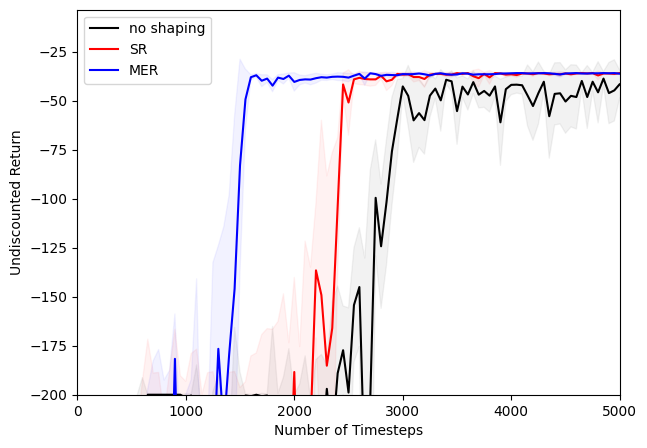

In [478]:
### plot best scenario
plt.figure(figsize=(7, 5))

# baseline
x, y, name = load_setting(path, "baseline", 0, 0.0, 1.0)
plot_mean_and_conf_interval(x, y, label='no shaping', color="black", alpha=1)

# SR best
x, y, name = load_setting(path, "SR", 0, 0.75, 1.0)
plot_mean_and_conf_interval(x, y, label="SR", color="red", alpha=1)

# MER best
x, y, name = load_setting(path, "MER", 0, 1.0, 1.0)
plot_mean_and_conf_interval(x, y, label="MER", color="blue", alpha=1)

plt.legend()
plt.xlim([0, 5000])
plt.ylim([-200, None])
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")
plt.savefig("plots/reward_shaping/Empty2.png", dpi=300)

### MiniGrid-MaxEntFourRooms-v0

In [479]:
env_name = "MiniGrid-MaxEntFourRooms-v0"
path = join(".", "experiments", "reward_shaping", env_name)

In [480]:
# # baseline
# lrs = [0.1, 0.3, 1.0]
# colors = ["red", "g", "b"]
# seeds = range(1, 20 + 1)

# for lr, c in zip(lrs, colors):
#     data_for_all_seeds = []
#     for seed in seeds:
#         name = f"baseline-0-0.0-{lr}-{seed}.pkl"
#         data = load_data(path, name)
#         data_for_all_seeds.append(data['perf'])   # get performance for all seeds

#     plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

# plt.legend()
# plt.xlabel("Number of Timesteps")
# plt.ylabel("Undiscounted Return")

# # best learning rate: 0.3

In [481]:
# # SR: best learning rate for each r-shaped-weight
# r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
# lrs = [0.1, 0.3, 1.0]
# colors = ["red", "g", "b"]
# seeds = range(1, 20 + 1)

# for r_w in r_shaped_weights:
#     for lr, c in zip(lrs, colors):
#         data_for_all_seeds = []
#         for seed in seeds:
#             name = f"SR-0-{r_w}-{lr}-{seed}.pkl"
#             data = load_data(path, name)
#             data_for_all_seeds.append(data['perf'])   # get performance for all seeds
    
#         plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

#     plt.legend()
#     plt.xlabel("Number of Timesteps")
#     plt.ylabel("Undiscounted Return")
#     plt.show()

# # best learning rate: 1 for all r_shaped_weights

In [482]:
# # SR: best r_shaped_weight
# r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
# colors = ['r', 'g', 'b', 'pink']
# for r_w, c in zip(r_shaped_weights,colors):
#     data_for_all_seeds = []
#     for seed in seeds:
#         name = f"SR-0-{r_w}-{1.0}-{seed}.pkl"
#         data = load_data(path, name)
#         data_for_all_seeds.append(data['perf'])   # get performance for all seeds

#     plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

# plt.legend()
# plt.xlabel("Number of Timesteps")
# plt.ylabel("Undiscounted Return")
# plt.xlim([0, 4000])
# plt.show()

# # SR best setting: r_shaped_weight 1.0, lr 1.0

In [483]:
# # MER: best lr for each r_shaped_weight
# r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
# lrs = [0.1, 0.3, 1.0]
# colors = ["red", "g", "b"]
# seeds = range(1, 20 + 1)

# for r_w in r_shaped_weights:
#     for lr, c in zip(lrs, colors):
#         data_for_all_seeds = []
#         for seed in seeds:
#             name = f"MER-0-{r_w}-{lr}-{seed}.pkl"
#             data = load_data(path, name)
#             data_for_all_seeds.append(data['perf'])   # get performance for all seeds
    
#         plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

#     plt.legend()
#     plt.xlabel("Number of Timesteps")
#     plt.ylabel("Undiscounted Return")
#     plt.show()

# # best learning rate: 1 for all r_shaped_weights

In [484]:
# # MER: best r_shaped_weight
# r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
# colors = ['r', 'g', 'b', 'pink']
# for r_w, c in zip(r_shaped_weights,colors):
#     data_for_all_seeds = []
#     for seed in seeds:
#         name = f"MER-0-{r_w}-{1.0}-{seed}.pkl"
#         data = load_data(path, name)
#         data_for_all_seeds.append(data['perf'])   # get performance for all seeds

#     plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

# plt.legend()
# plt.xlabel("Number of Timesteps")
# plt.ylabel("Undiscounted Return")
# plt.xlim([0, 4000])
# plt.show()

# # MER best: r_shaped_weight 1.0, lr 1.0

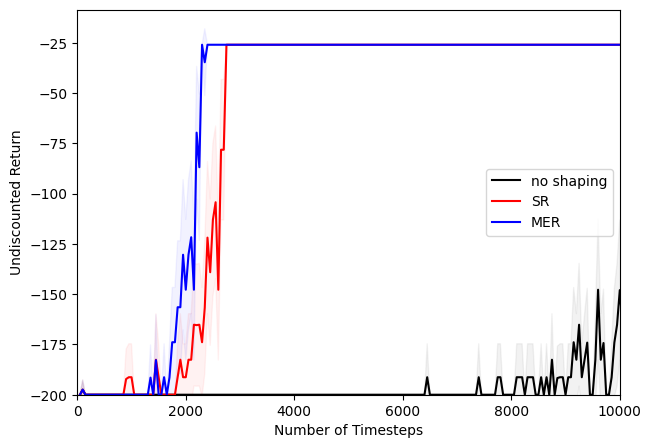

In [485]:
### plot best scenario
plt.figure(figsize=(7, 5))

# baseline
x, y, name = load_setting(path, "baseline", 0, 0.0, 0.3)
plot_mean_and_conf_interval(x, y, label='no shaping', color="black", alpha=1)

# SR best
x, y, name = load_setting(path, "SR", 0, 1.0, 1.0)
plot_mean_and_conf_interval(x, y, label="SR", color="red", alpha=1)

# MER best
x, y, name = load_setting(path, "MER", 0, 1.0, 1.0)
plot_mean_and_conf_interval(x, y, label="MER", color="blue", alpha=1)

plt.legend()
plt.xlim([0, 10000])
plt.ylim([-200, None])
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")
plt.savefig("plots/reward_shaping/FourRooms.png", dpi=300)

### MiniGrid-MaxEntFourRooms2-v0

In [486]:
env_name = "MiniGrid-MaxEntFourRooms2-v0"
path = join(".", "experiments", "reward_shaping", env_name)

In [488]:
# # baseline
# lrs = [0.1, 0.3, 1.0]
# colors = ["red", "g", "b"]
# seeds = range(1, 20 + 1)

# for lr, c in zip(lrs, colors):
#     data_for_all_seeds = []
#     for seed in seeds:
#         name = f"baseline-0-0.0-{lr}-{seed}.pkl"
#         data = load_data(path, name)
#         data_for_all_seeds.append(data['perf'])   # get performance for all seeds

#     plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

# plt.legend()
# plt.xlabel("Number of Timesteps")
# plt.ylabel("Undiscounted Return")

# # best learning rate: 0.3

In [489]:
# # SR: best learning rate for each r-shaped-weight
# r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
# lrs = [0.1, 0.3, 1.0]
# colors = ["red", "g", "b"]
# seeds = range(1, 20 + 1)

# for r_w in r_shaped_weights:
#     for lr, c in zip(lrs, colors):
#         data_for_all_seeds = []
#         for seed in seeds:
#             name = f"SR-0-{r_w}-{lr}-{seed}.pkl"
#             data = load_data(path, name)
#             data_for_all_seeds.append(data['perf'])   # get performance for all seeds
    
#         plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

#     plt.legend()
#     plt.xlabel("Number of Timesteps")
#     plt.ylabel("Undiscounted Return")
#     plt.show()

# # best learning rate: 1 for all r_shaped_weights

In [490]:
# # SR: best r_shaped_weight
# r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
# colors = ['r', 'g', 'b', 'pink']
# for r_w, c in zip(r_shaped_weights,colors):
#     data_for_all_seeds = []
#     for seed in seeds:
#         name = f"SR-0-{r_w}-{1.0}-{seed}.pkl"
#         data = load_data(path, name)
#         data_for_all_seeds.append(data['perf'])   # get performance for all seeds

#     plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

# plt.legend()
# plt.xlabel("Number of Timesteps")
# plt.ylabel("Undiscounted Return")
# plt.xlim([0, 4000])
# plt.show()

# # SR best setting: r_shaped_weight 1.0, lr 1.0

In [491]:
# # MER: best lr for each r_shaped_weight
# r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
# lrs = [0.1, 0.3, 1.0]
# colors = ["red", "g", "b"]
# seeds = range(1, 20 + 1)

# for r_w in r_shaped_weights:
#     for lr, c in zip(lrs, colors):
#         data_for_all_seeds = []
#         for seed in seeds:
#             name = f"MER-0-{r_w}-{lr}-{seed}.pkl"
#             data = load_data(path, name)
#             data_for_all_seeds.append(data['perf'])   # get performance for all seeds
    
#         plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

#     plt.legend()
#     plt.xlabel("Number of Timesteps")
#     plt.ylabel("Undiscounted Return")
#     plt.show()

# # best learning rate: 1 for all r_shaped_weights

In [492]:
# # MER: best r_shaped_weight
# r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
# colors = ['r', 'g', 'b', 'pink']
# for r_w, c in zip(r_shaped_weights,colors):
#     data_for_all_seeds = []
#     for seed in seeds:
#         name = f"MER-0-{r_w}-{1.0}-{seed}.pkl"
#         data = load_data(path, name)
#         data_for_all_seeds.append(data['perf'])   # get performance for all seeds

#     plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

# plt.legend()
# plt.xlabel("Number of Timesteps")
# plt.ylabel("Undiscounted Return")
# plt.xlim([0, 4000])
# plt.show()

# # MER best: r_shaped_weight 1.0, lr 1.0

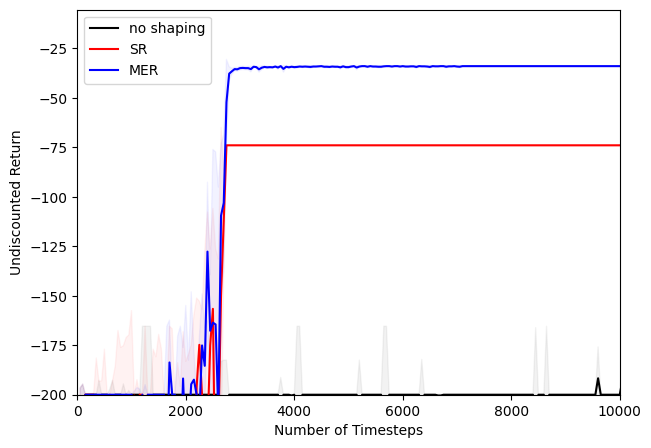

In [493]:
### plot best scenario
plt.figure(figsize=(7, 5))

# baseline
x, y, name = load_setting(path, "baseline", 0, 0.0, 0.3)
plot_mean_and_conf_interval(x, y, label='no shaping', color="black", alpha=1)

# SR best
x, y, name = load_setting(path, "SR", 0, 1.0, 1.0)
plot_mean_and_conf_interval(x, y, label="SR", color="red", alpha=1)

# MER best
x, y, name = load_setting(path, "MER", 0, 1.0, 1.0)
plot_mean_and_conf_interval(x, y, label="MER", color="blue", alpha=1)

plt.legend()
plt.xlim([0, 10000])
plt.ylim([-200, None])
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")
plt.savefig("plots/reward_shaping/FourRooms2.png", dpi=300)

### Learn Rep TD

In [139]:
env_name = "MiniGrid-MaxEntFourrooms2-v0"
path = join(".", "experiments", "learn_rep_td", env_name)

LR 0.0001 0.7705027989440659
LR 0.0003 0.7441537775220353
LR 0.001 0.658772647135323
LR 0.003 0.4636449999951594
LR 0.01 0.11765229195347171
LR 0.03 0.0635287298845495
LR 0.1 0.11053069582058439
LR 0.3 0.36534181020033973
LR 1.0 1.5568651251747725


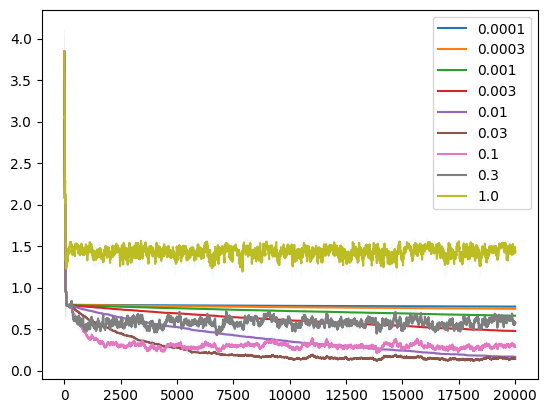

In [143]:
rep = "MER"

for lr in [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0]:
    maes = []
    mses = []
    for seed in range(1, 21):
        with open(join(path, f"{rep}-{lr}-{seed}.pkl"), "rb") as f:
            data = pickle.load(f)

        maes.append(data['mae'])
        mses.append(data['mse'])

    plot_mean_and_conf_interval(range(len(maes[0])), maes, lr, None, 1)
    print("LR", lr, data['mae'][-1])

# plt.ylim([0, 0.2])
# plt.ylim([0, 6])
# plt.xlim([0, 1000]) 
plt.legend()


#### Best Constant Learning Rates (Environment Dependent):
- Empty
    - SR: 0.1
    - DR: 0.03
    - MER: 0.03
- Empty 2
    - SR: 0.1
    - DR: 0.03
    - MER: 0.03
- Four-room
    - SR: 0.3
    - DR: 0.3
    - MER: 0.1
- Four-room2
    - SR: 0.3
    - DR: 0.3
    - MER: 0.1

#### Episodes Required: 100, 500, 1000

### Reward Shaping TD

In [374]:
env_name = "MiniGrid-MaxEntEmpty-v0"
path = join(".", "experiments", "reward_shaping_td", env_name)

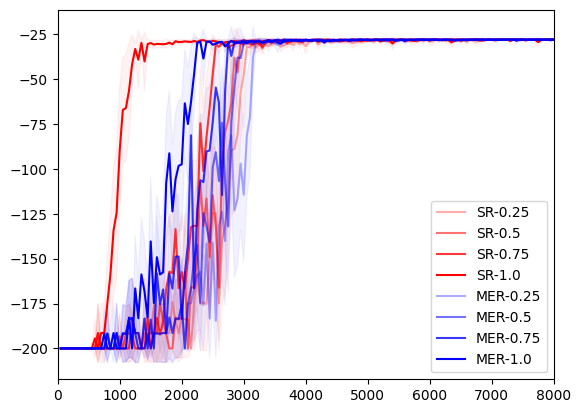

In [375]:
n_episodes = 100

r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
lr = 1.0
for rep, c in zip(["SR", "MER"], ['red', 'blue']):
    for r, alpha in zip(r_shaped_weights, construct_alphas(r_shaped_weights)):

        perfs = []
        for seed in range(1, 21):
            with open(join(path, f"{rep}-{n_episodes}-0-{r}-{lr}-{seed}.pkl"), "rb") as f:
                data = pickle.load(f)
            perfs.append(data['perf'])

        # if np.mean(perfs, 0)[-1] < -35:
        #     continue
        plot_mean_and_conf_interval(data['t'], perfs, f"{rep}-{r}", c, alpha)

# plt.ylim([-50, -30])
plt.xlim([0, 8000])
plt.legend()


- 100 episodes
    - Empty
        - SR best: 1, MER best: 1
    - Empty 2
        - SR: 0.75, MER: 0.75
    - Four-Room
        - SR best: 1, MER best: 1
    - Four-Room-2
        - SR best: 0.75, MER: 0.75
- 500 episodes
    - Empty
        - SR best: 1, MER best: 1
    - Empty 2
        - SR best: 0.75, MER best: 1
    - Four-Room
        - SR best: 1, MER best: 1
    - Four-Room 2
        - SR best: 0.75, MER best: 1
- 1000 episodes
    - Empty
        - SR best: 1, MER best: 1
    - Empty 2
        - SR: 0.75, MER: 1
    - Four-Room
        - SR: 0.75, MER: 1
    - Four-Room-2
        - SR: 0.75, MER: 1
- 5000 episodes
    - Empty
        - SR best: 1, MER best: 1
    - Empty2
        - SR: 0.75, MER best: 1
    - Four-Room
        - SR: 1, MER: 1
    - Four-Room-2
        - SR: 0.75, MER: 1

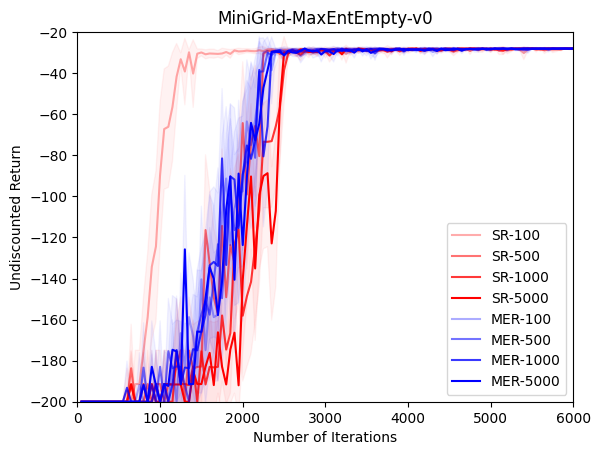

In [385]:
env_name = "MiniGrid-MaxEntEmpty-v0"
path = join(".", "experiments", "reward_shaping_td", env_name)

n_episodes = [100, 500, 1000, 5000]
r_shaped_weight = 1.0
lr = 1.0

for rep, c in zip(["SR", "MER"], ['red', 'blue']):
    for n, alpha in zip(n_episodes, construct_alphas(n_episodes)):
        perfs = []
        for seed in range(1, 21):
            with open(join(path, f"{rep}-{n}-0-{r_shaped_weight}-{lr}-{seed}.pkl"), "rb") as f:
                data = pickle.load(f)
            perfs.append(data['perf'])

        plot_mean_and_conf_interval(data['t'], perfs, f"{rep}-{n}", c, alpha)

plt.xlim([0, 6000])
plt.ylim([-200, -20])
plt.xlabel("Number of Iterations")
plt.ylabel("Undiscounted Return")
plt.title(env_name)
plt.legend()

In [318]:
# gin.parse_config_files_and_bindings(
#         [os.path.join("./envs/", '{}.gin'.format('maxent_fourrooms'))],
#         bindings=[],
#         skip_unknown=False)
# env_id = maxent_mon_minigrid.register_environment()

In [319]:
# env = gym.make('MiniGrid-MaxEntFourRooms-v0')

TypeError: Invalid shape (104,) for image data

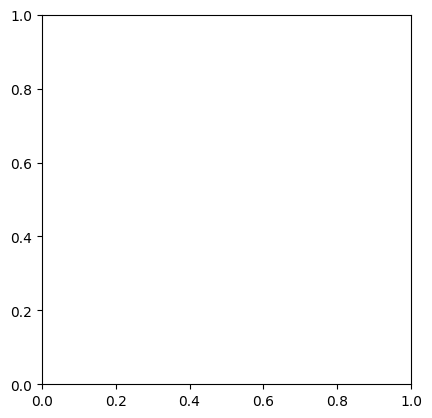

In [299]:
env_name = "MiniGrid-MaxEntFourRooms-v0"
path = join(".", "experiments", "reward_shaping_td", env_name)

rep = "SR"
n_episodes = 100
r_shaped_weight = 1.0


for seed in range(1, 21):
    with open(join(path, f"{rep}-{n_episodes}-0-{r_shaped_weight}-{1.0}-{seed}.pkl"), "rb") as f:
        data = pickle.load(f)

    plt.imshow(data['reward_shaped'])
    plt.show()

### Fit Rep TD

In [371]:
env_name = "MiniGrid-MaxEntFourRooms-v0"
path = join(".", "experiments", "fit_rep_td", env_name)

LR 0.01 0.021475065523254955
LR 0.03 0.04862687809944077
LR 0.1 0.057241570410745624
LR 0.3 0.010161064772390205
LR 1.0 4.539610842613229e-05


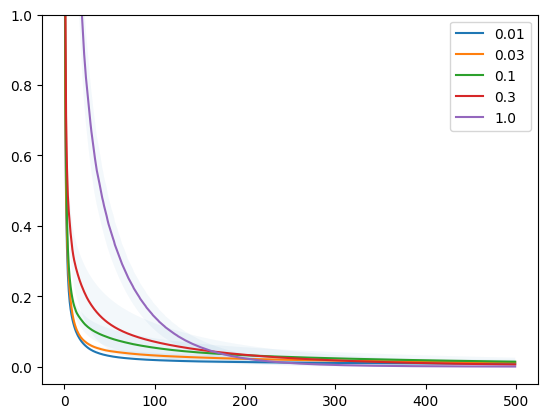

In [373]:
rep = "SR"
n_episodes = 100

for lr in [0.01, 0.03, 0.1, 0.3, 1.0]:
    maes = []
    mses = []
    for seed in range(1, 21):
        with open(join(path, f"{rep}-{n_episodes}-{lr}-{seed}.pkl"), "rb") as f:
            data = pickle.load(f)

        maes.append(data['mae'])
        mses.append(data['mse'])

    plot_mean_and_conf_interval(range(len(maes[0])), maes, lr, None, 1)
    print("LR", lr, data['mae'][-1])

# plt.ylim([0, 0.2])
plt.ylim([-0.05, 1])
# plt.xlim([0, 50]) 
plt.legend()

### Reward Shaping Fit

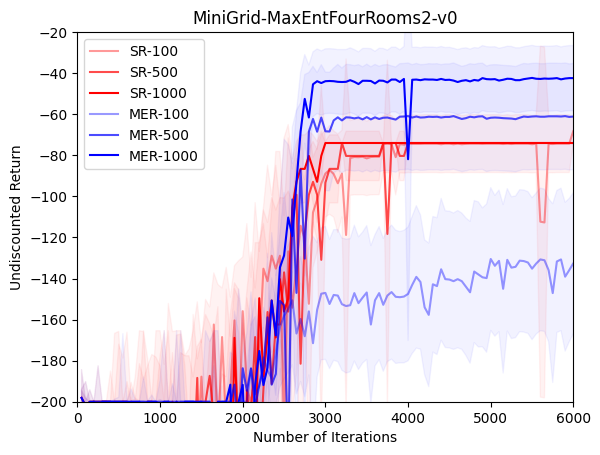

In [532]:
env_name = "MiniGrid-MaxEntFourRooms2-v0"
path = join(".", "experiments", "reward_shaping_fit", env_name)

n_episodes = [100, 500, 1000]
r_shaped_weight = 1.0
lr = 1.0

for rep, c in zip(["SR", "MER"], ['red', 'blue']):
    for n, alpha in zip(n_episodes, construct_alphas(n_episodes)):
        perfs = []
        for seed in range(1, 21):
            with open(join(path, f"{rep}-{n}-0-{r_shaped_weight}-{lr}-{seed}.pkl"), "rb") as f:
                data = pickle.load(f)
            perfs.append(data['perf'])

        plot_mean_and_conf_interval(data['t'], perfs, f"{rep}-{n}", c, alpha)

plt.xlim([0, 6000])
plt.ylim([-200, -20])
plt.xlabel("Number of Iterations")
plt.ylabel("Undiscounted Return")
plt.title(env_name)
plt.legend()

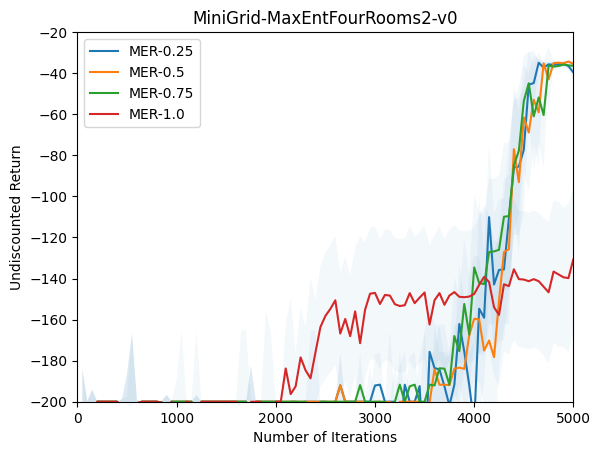

In [528]:
env_name = "MiniGrid-MaxEntFourRooms2-v0"
path = join(".", "experiments", "reward_shaping_fit", env_name)

rep = "MER"
n_episodes = 100
r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
lr = 1.0

for r in r_shaped_weights:
    
    perfs = []
    for seed in range(1, 21):
        with open(join(path, f"{rep}-{n_episodes}-0-{r}-{lr}-{seed}.pkl"), "rb") as f:
            data = pickle.load(f)
        perfs.append(data['perf'])

        # plt.plot(data['t'], data['perf'], label=seed)

    plot_mean_and_conf_interval(data['t'], perfs, f"{rep}-{r}", None, alpha)


plt.xlabel("Number of Iterations")
plt.ylabel("Undiscounted Return")
plt.title(env_name)
plt.xlim([0, 5000])
plt.ylim([-200, -20])
plt.legend()


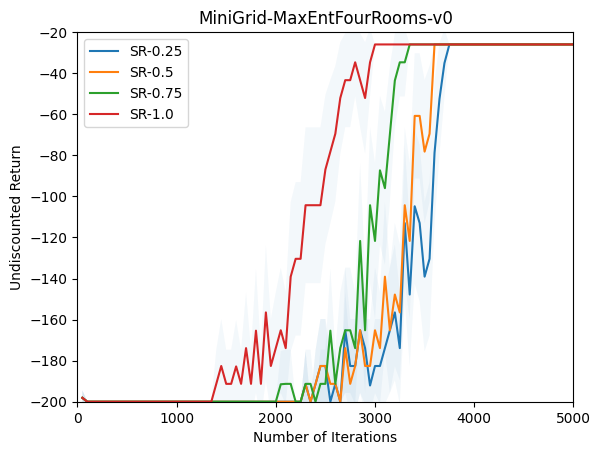

In [507]:
env_name = "MiniGrid-MaxEntFourRooms-v0"
path = join(".", "experiments", "reward_shaping_fit", env_name)

rep = "SR"
n_episodes = 1000
r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
lr = 1.0

for r in r_shaped_weights:
    
    perfs = []
    for seed in range(1, 21):
        with open(join(path, f"{rep}-{n_episodes}-0-{r}-{lr}-{seed}.pkl"), "rb") as f:
            data = pickle.load(f)
        perfs.append(data['perf'])

    plot_mean_and_conf_interval(data['t'], perfs, f"{rep}-{r}", None, alpha)


plt.xlabel("Number of Iterations")
plt.ylabel("Undiscounted Return")
plt.title(env_name)
plt.xlim([0, 5000])
plt.ylim([-200, -30])
plt.legend()

# Reward Shaping Fit MER init 0

## 100 Episodes

### Empty

In [590]:
env_name = "MiniGrid-MaxEntEmpty-v0"
path = join(".", "experiments", "reward_shaping_fit", env_name)
baseline_path = join(".", "experiments", "reward_shaping", env_name)

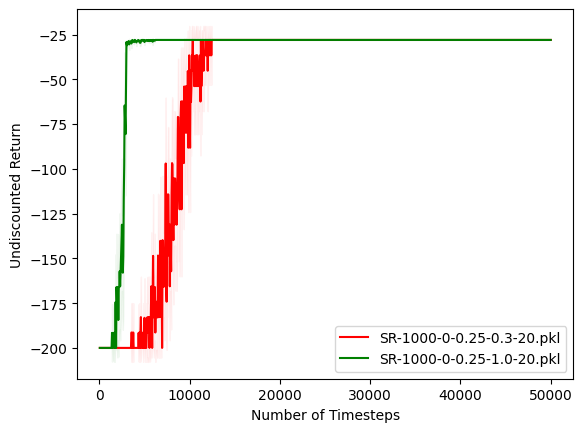

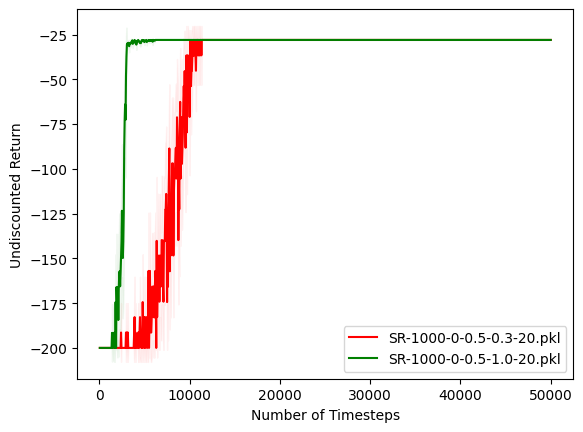

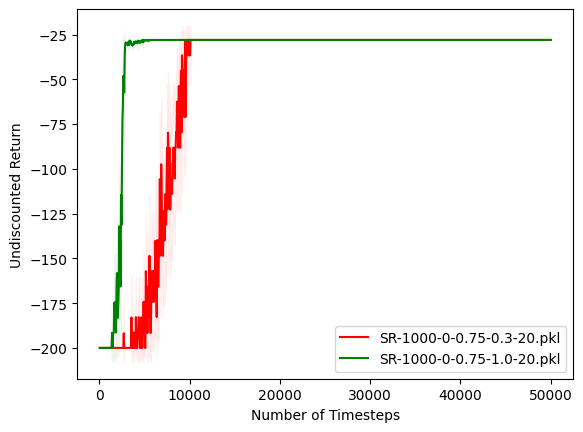

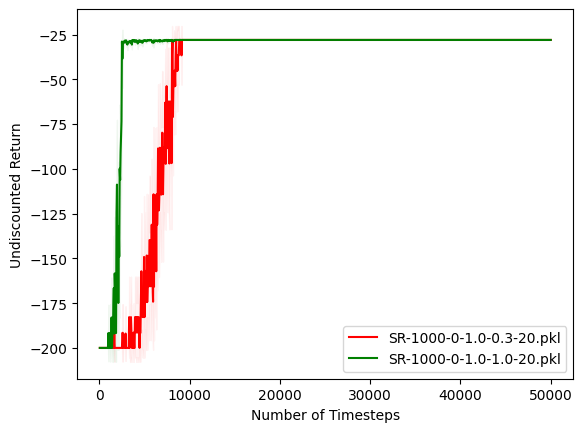

In [585]:
# SR best learning rate
n_episodes = 1000
r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
lrs = [0.3, 1.0]
colors = ["red", "g", "b"]
seeds = range(1, 20 + 1)

for r_w in r_shaped_weights:
    for lr, c in zip(lrs, colors):
        data_for_all_seeds = []
        for seed in seeds:
            name = f"SR-{n_episodes}-0-{r_w}-{lr}-{seed}.pkl"
            data = load_data(path, name)
            data_for_all_seeds.append(data['perf'])   # get performance for all seeds
    
        plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

    plt.legend()
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Undiscounted Return")
    plt.show()

# Best learning rate: 1.0 for all n_episodes

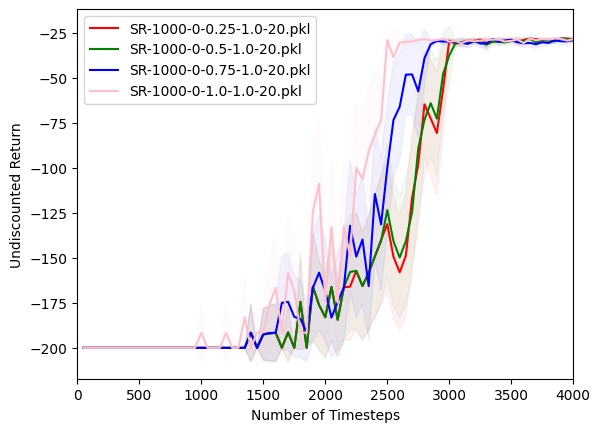

In [586]:
n_episodes = 1000
r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
colors = ['r', 'g', 'b', 'pink']
for r_w, c in zip(r_shaped_weights,colors):
    data_for_all_seeds = []
    for seed in seeds:
        name = f"SR-{n_episodes}-0-{r_w}-{1.0}-{seed}.pkl"
        data = load_data(path, name)
        data_for_all_seeds.append(data['perf'])   # get performance for all seeds

    plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

plt.legend()
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")
plt.xlim([0, 4000])
plt.show()

# 100, 500, 1000 episodes: r 1.0, lr 1.0

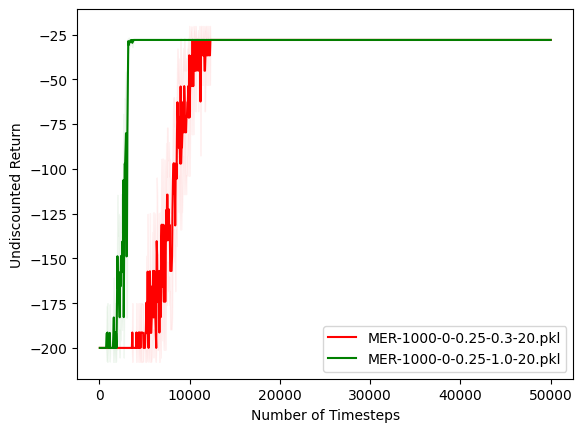

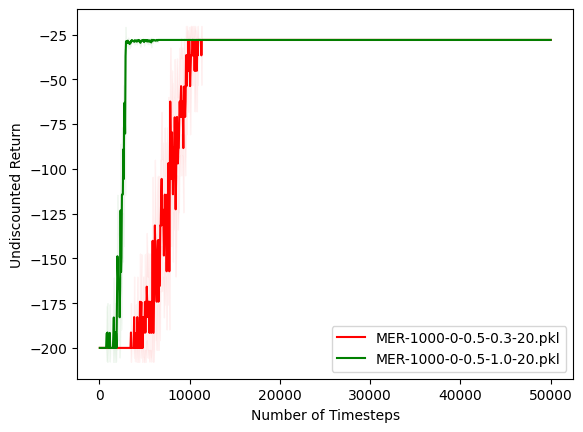

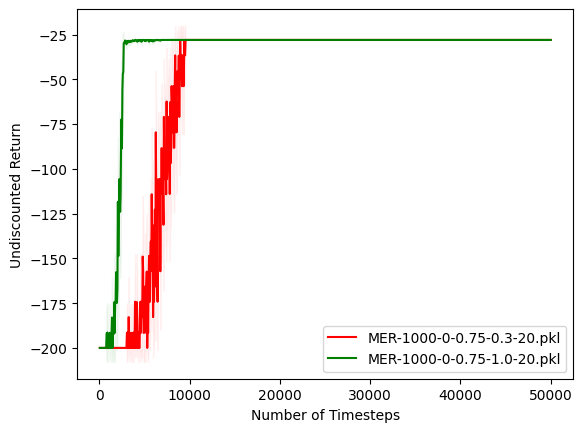

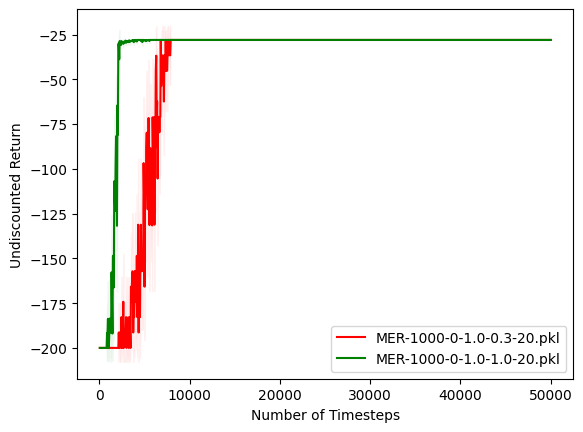

In [587]:
# MER best learning rate
n_episodes = 1000
r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
lrs = [0.3, 1.0]
colors = ["red", "g", "b"]
seeds = range(1, 20 + 1)

for r_w in r_shaped_weights:
    for lr, c in zip(lrs, colors):
        data_for_all_seeds = []
        for seed in seeds:
            name = f"MER-{n_episodes}-0-{r_w}-{lr}-{seed}.pkl"
            data = load_data(path, name)
            data_for_all_seeds.append(data['perf'])   # get performance for all seeds
    
        plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

    plt.legend()
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Undiscounted Return")
    plt.show()

# Best learning rate: 1.0 for all n_episodes

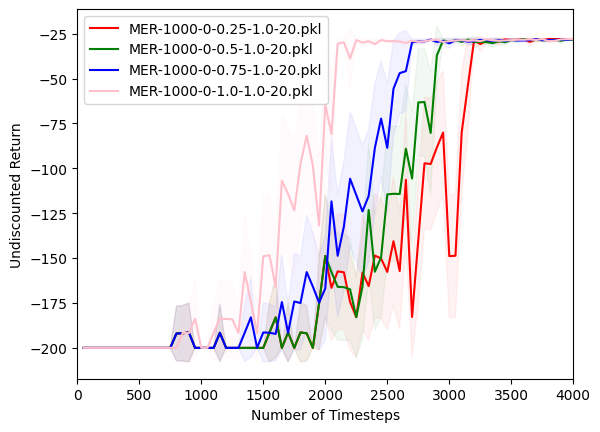

In [588]:
n_episodes = 1000
r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
colors = ['r', 'g', 'b', 'pink']
for r_w, c in zip(r_shaped_weights,colors):
    data_for_all_seeds = []
    for seed in seeds:
        name = f"MER-{n_episodes}-0-{r_w}-{1.0}-{seed}.pkl"
        data = load_data(path, name)
        data_for_all_seeds.append(data['perf'])   # get performance for all seeds

    plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

plt.legend()
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")
plt.xlim([0, 4000])
plt.show()

# 100, 500, 1000 episodes: r 1.0, lr 1.0

Text(0, 0.5, 'Undiscounted Return')

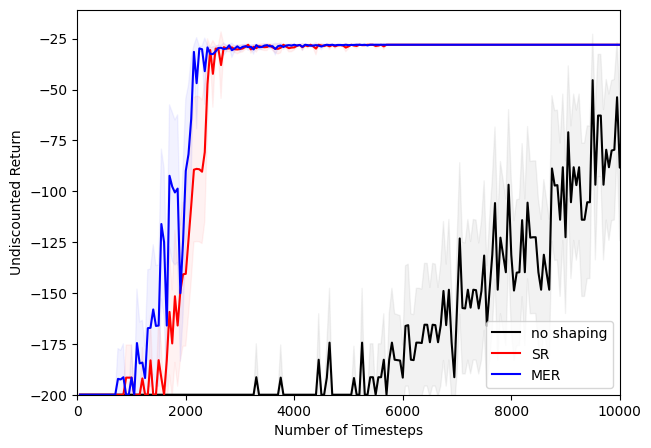

In [601]:
# best setting
plt.figure(figsize=(7, 5))
n_episodes = 100
# baseline
x, y, name = load_setting(baseline_path, "baseline", 0, 0.0, 0.3)
plot_mean_and_conf_interval(x, y, label='no shaping', color="black", alpha=1)

# SR best
x, y, name = load_fit_setting(path, "SR", n_episodes, 0, 1.0, 1.0)
plot_mean_and_conf_interval(x, y, label="SR", color="red", alpha=1)

# MER best
x, y, name = load_fit_setting(path, "MER", n_episodes, 0, 1.0, 1.0)
plot_mean_and_conf_interval(x, y, label="MER", color="blue", alpha=1)

plt.legend(loc='lower right')
plt.xlim([0, 10000])
plt.ylim([-200, None])
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")


Text(0, 0.5, 'Undiscounted Return')

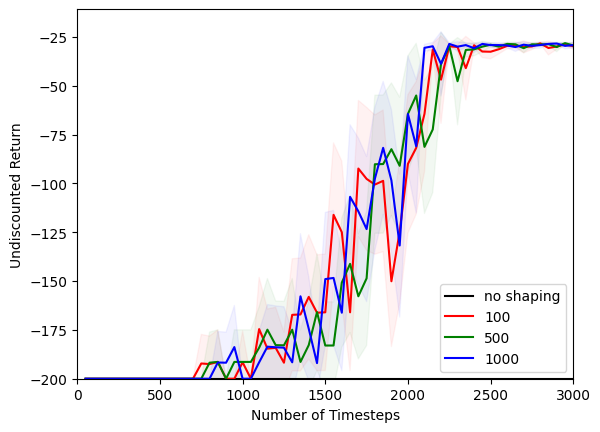

In [597]:
# baseline
x, y, name = load_setting(baseline_path, "baseline", 0, 0.0, 0.3)
plot_mean_and_conf_interval(x, y, label='no shaping', color="black", alpha=1)

n_episodes = [100, 500, 1000]
colors = ['r', 'g', 'b']

for n, c in zip(n_episodes, colors):
    x, y, name = load_fit_setting(path, "MER", n, 0, 1.0, 1.0)
    plot_mean_and_conf_interval(x, y, label=n, color=c, alpha=1)
    
plt.legend(loc='lower right')
plt.xlim([0, 3000])
plt.ylim([-200, None])
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")

Text(0, 0.5, 'Undiscounted Return')

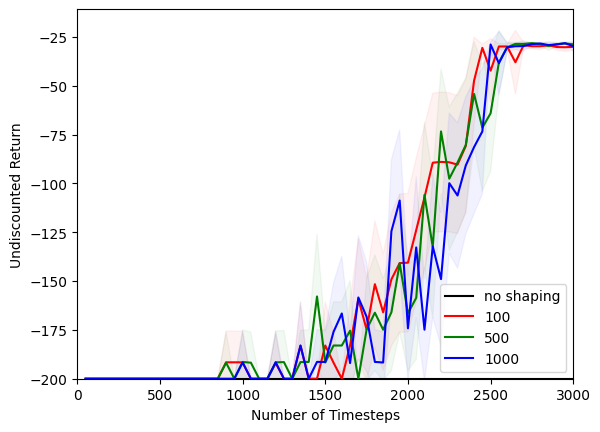

In [598]:
# baseline
x, y, name = load_setting(baseline_path, "baseline", 0, 0.0, 0.3)
plot_mean_and_conf_interval(x, y, label='no shaping', color="black", alpha=1)

n_episodes = [100, 500, 1000]
colors = ['r', 'g', 'b']

for n, c in zip(n_episodes, colors):
    x, y, name = load_fit_setting(path, "SR", n, 0, 1.0, 1.0)
    plot_mean_and_conf_interval(x, y, label=n, color=c, alpha=1)
    
plt.legend(loc='lower right')
plt.xlim([0, 3000])
plt.ylim([-200, None])
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")

### Empty 2

In [602]:
env_name = "MiniGrid-MaxEntEmpty2-v0"
path = join(".", "experiments", "reward_shaping_fit", env_name)
baseline_path = join(".", "experiments", "reward_shaping", env_name)

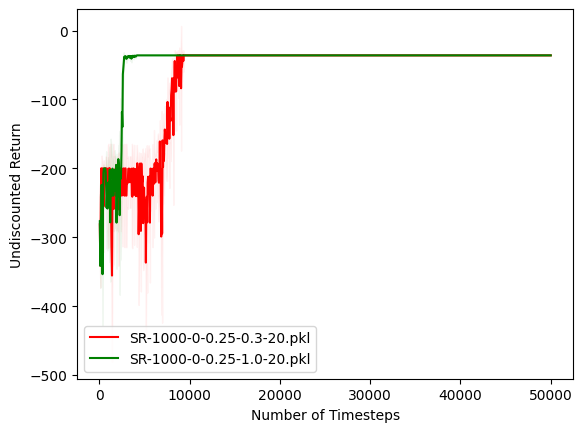

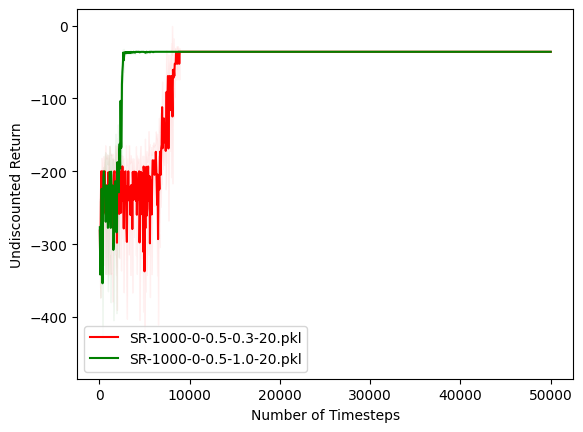

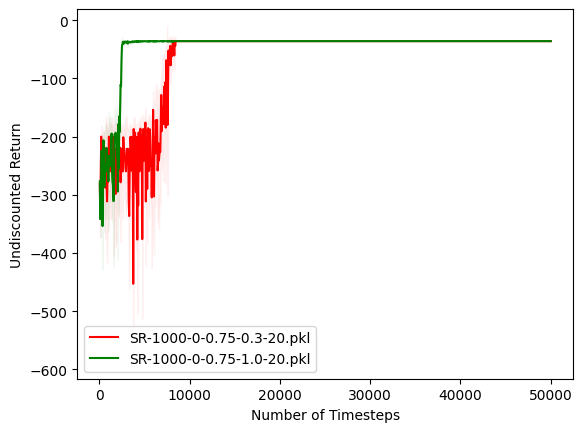

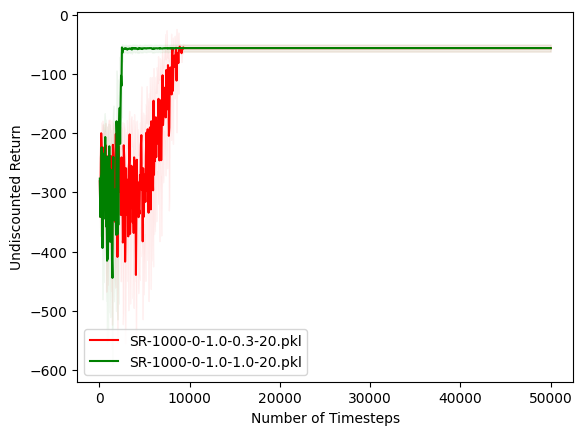

In [605]:
# SR best learning rate
n_episodes = 1000
r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
lrs = [0.3, 1.0]
colors = ["red", "g", "b"]
seeds = range(1, 20 + 1)

for r_w in r_shaped_weights:
    for lr, c in zip(lrs, colors):
        data_for_all_seeds = []
        for seed in seeds:
            name = f"SR-{n_episodes}-0-{r_w}-{lr}-{seed}.pkl"
            data = load_data(path, name)
            data_for_all_seeds.append(data['perf'])   # get performance for all seeds
    
        plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

    plt.legend()
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Undiscounted Return")
    plt.show()

# Best learning rate: 1.0 for all n_episodes

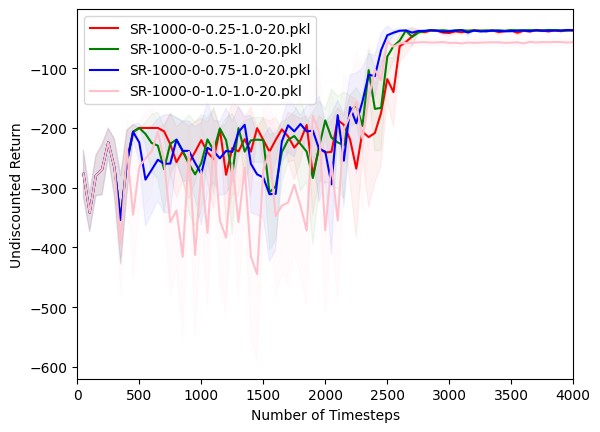

In [608]:
n_episodes = 1000
r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
colors = ['r', 'g', 'b', 'pink']
for r_w, c in zip(r_shaped_weights,colors):
    data_for_all_seeds = []
    for seed in seeds:
        name = f"SR-{n_episodes}-0-{r_w}-{1.0}-{seed}.pkl"
        data = load_data(path, name)
        data_for_all_seeds.append(data['perf'])   # get performance for all seeds

    plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

plt.legend()
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")
plt.xlim([0, 4000])
plt.show()

# 100, 500, 1000 episodes: r 0.75, lr 1.0

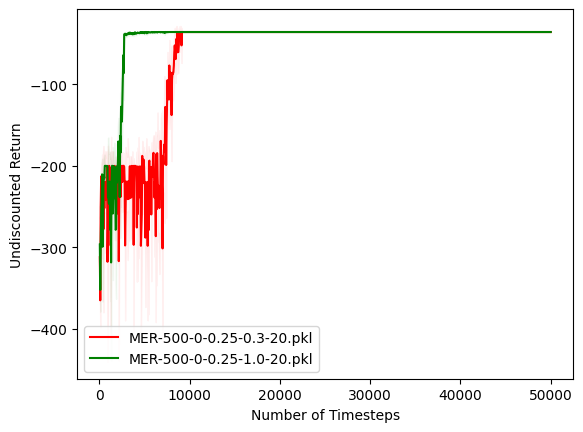

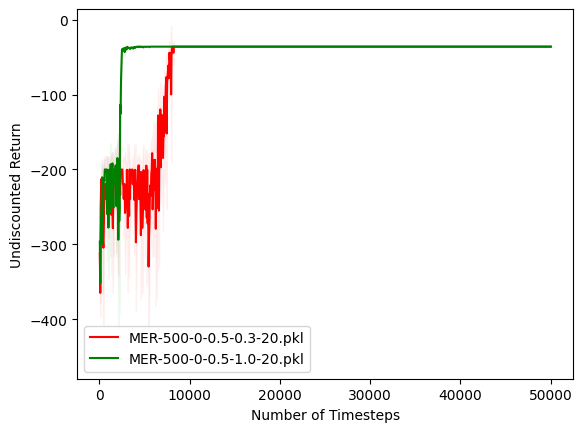

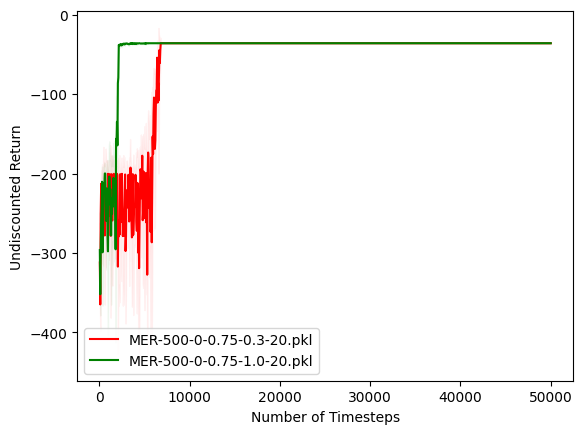

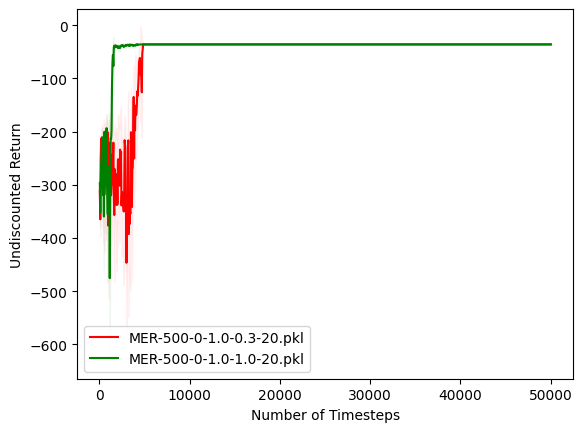

In [611]:
# MER best learning rate
n_episodes = 500
r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
lrs = [0.3, 1.0]
colors = ["red", "g", "b"]
seeds = range(1, 20 + 1)

for r_w in r_shaped_weights:
    for lr, c in zip(lrs, colors):
        data_for_all_seeds = []
        for seed in seeds:
            name = f"MER-{n_episodes}-0-{r_w}-{lr}-{seed}.pkl"
            data = load_data(path, name)
            data_for_all_seeds.append(data['perf'])   # get performance for all seeds
    
        plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

    plt.legend()
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Undiscounted Return")
    plt.show()

# Best learning rate: 1.0 for all n_episodes

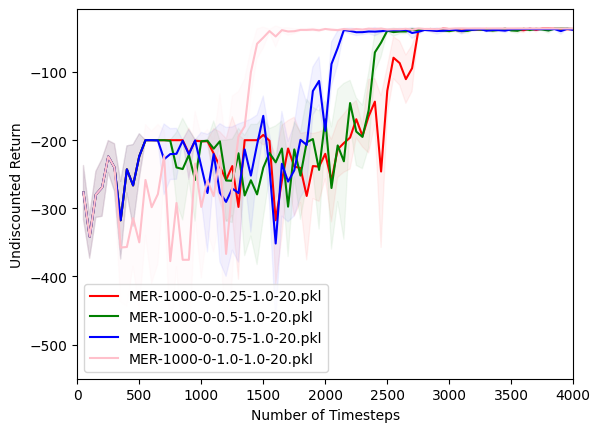

In [614]:
n_episodes = 1000
r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
colors = ['r', 'g', 'b', 'pink']
for r_w, c in zip(r_shaped_weights,colors):
    data_for_all_seeds = []
    for seed in seeds:
        name = f"MER-{n_episodes}-0-{r_w}-{1.0}-{seed}.pkl"
        data = load_data(path, name)
        data_for_all_seeds.append(data['perf'])   # get performance for all seeds

    plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

plt.legend()
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")
plt.xlim([0, 4000])
plt.show()

# 100, 500, 1000 episodes: r 1.0, lr 1.0

Text(0, 0.5, 'Undiscounted Return')

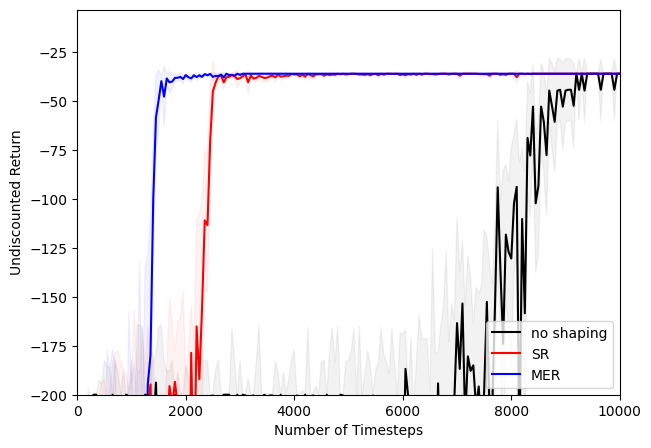

In [617]:
# best setting
plt.figure(figsize=(7, 5))
n_episodes = 1000
# baseline
x, y, name = load_setting(baseline_path, "baseline", 0, 0.0, 0.3)
plot_mean_and_conf_interval(x, y, label='no shaping', color="black", alpha=1)

# SR best
x, y, name = load_fit_setting(path, "SR", n_episodes, 0, 0.75, 1.0)
plot_mean_and_conf_interval(x, y, label="SR", color="red", alpha=1)

# MER best
x, y, name = load_fit_setting(path, "MER", n_episodes, 0, 1.0, 1.0)
plot_mean_and_conf_interval(x, y, label="MER", color="blue", alpha=1)

plt.legend(loc='lower right')
plt.xlim([0, 10000])
plt.ylim([-200, None])
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")

Text(0, 0.5, 'Undiscounted Return')

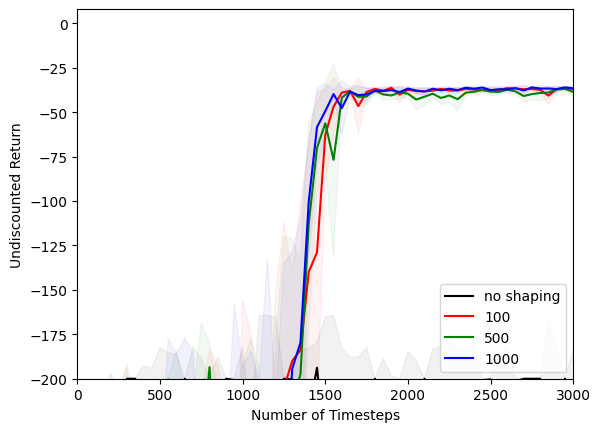

In [618]:
# baseline
x, y, name = load_setting(baseline_path, "baseline", 0, 0.0, 0.3)
plot_mean_and_conf_interval(x, y, label='no shaping', color="black", alpha=1)

n_episodes = [100, 500, 1000]
colors = ['r', 'g', 'b']

for n, c in zip(n_episodes, colors):
    x, y, name = load_fit_setting(path, "MER", n, 0, 1.0, 1.0)
    plot_mean_and_conf_interval(x, y, label=n, color=c, alpha=1)
    
plt.legend(loc='lower right')
plt.xlim([0, 3000])
plt.ylim([-200, None])
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")

Text(0, 0.5, 'Undiscounted Return')

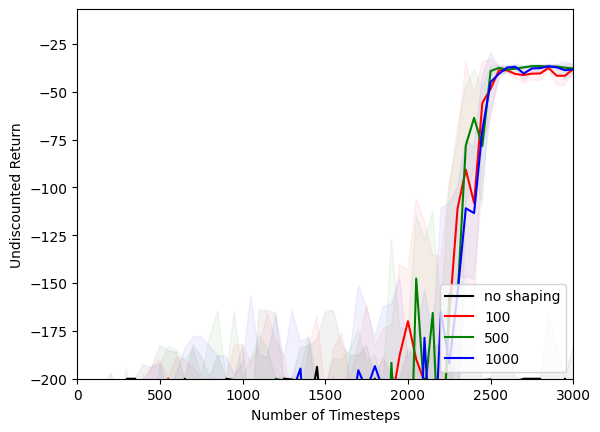

In [619]:
# baseline
x, y, name = load_setting(baseline_path, "baseline", 0, 0.0, 0.3)
plot_mean_and_conf_interval(x, y, label='no shaping', color="black", alpha=1)

n_episodes = [100, 500, 1000]
colors = ['r', 'g', 'b']

for n, c in zip(n_episodes, colors):
    x, y, name = load_fit_setting(path, "SR", n, 0, 0.75, 1.0)
    plot_mean_and_conf_interval(x, y, label=n, color=c, alpha=1)
    
plt.legend(loc='lower right')
plt.xlim([0, 3000])
plt.ylim([-200, None])
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")

### Four-Room

In [620]:
env_name = "MiniGrid-MaxEntFourRooms-v0"
path = join(".", "experiments", "reward_shaping_fit", env_name)
baseline_path = join(".", "experiments", "reward_shaping", env_name)

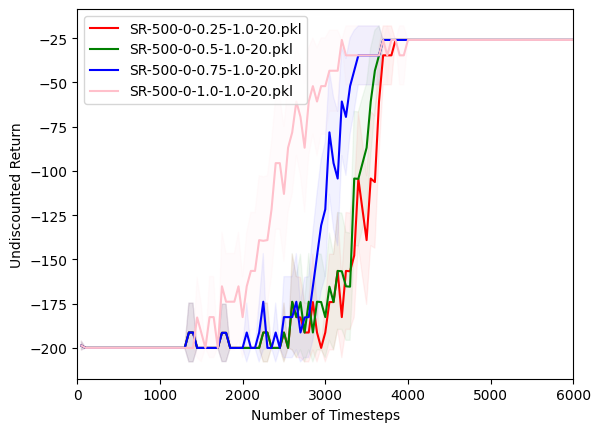

In [627]:
n_episodes = 500
r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
colors = ['r', 'g', 'b', 'pink']
for r_w, c in zip(r_shaped_weights,colors):
    data_for_all_seeds = []
    for seed in seeds:
        name = f"SR-{n_episodes}-0-{r_w}-{1.0}-{seed}.pkl"
        data = load_data(path, name)
        data_for_all_seeds.append(data['perf'])   # get performance for all seeds

    plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

plt.legend()
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")
plt.xlim([0, 6000])
plt.show()

# 100: r 0.75
# 500 0.75
# 1000 episodes: 1.0

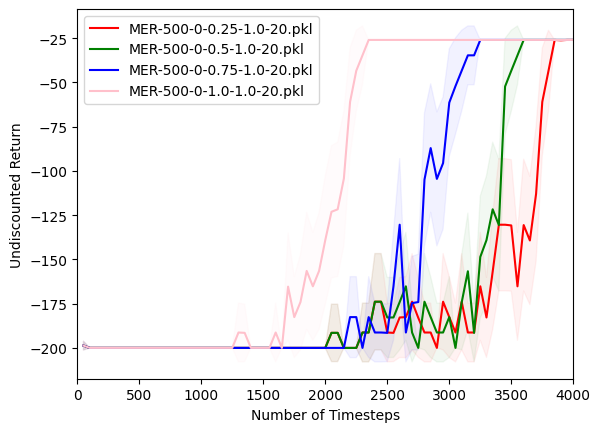

In [630]:
n_episodes = 500
r_shaped_weights = [0.25, 0.5, 0.75, 1.0]
colors = ['r', 'g', 'b', 'pink']
for r_w, c in zip(r_shaped_weights,colors):
    data_for_all_seeds = []
    for seed in seeds:
        name = f"MER-{n_episodes}-0-{r_w}-{1.0}-{seed}.pkl"
        data = load_data(path, name)
        data_for_all_seeds.append(data['perf'])   # get performance for all seeds

    plot_mean_and_conf_interval(data['t'], data_for_all_seeds, name, c, 1)

plt.legend()
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")
plt.xlim([0, 4000])
plt.show()

# 100, 500, 1000 episodes: r 1.0, lr 1.0

Text(0, 0.5, 'Undiscounted Return')

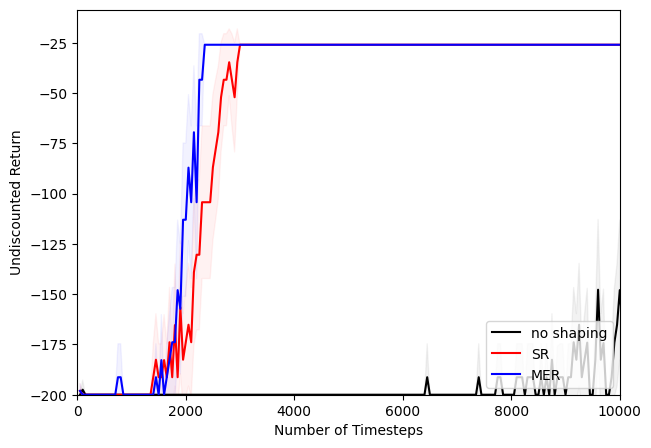

In [633]:
# best setting
plt.figure(figsize=(7, 5))
n_episodes = 1000

if n_episodes == 100 or n_episodes == 500:
    SR_r = 0.75
else:
    SR_r = 1.0

# baseline
x, y, name = load_setting(baseline_path, "baseline", 0, 0.0, 0.3)
plot_mean_and_conf_interval(x, y, label='no shaping', color="black", alpha=1)

# SR best
x, y, name = load_fit_setting(path, "SR", n_episodes, 0, SR_r, 1.0)
plot_mean_and_conf_interval(x, y, label="SR", color="red", alpha=1)

# MER best
x, y, name = load_fit_setting(path, "MER", n_episodes, 0, 1.0, 1.0)
plot_mean_and_conf_interval(x, y, label="MER", color="blue", alpha=1)

plt.legend(loc='lower right')
plt.xlim([0, 10000])
plt.ylim([-200, None])
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")

Text(0, 0.5, 'Undiscounted Return')

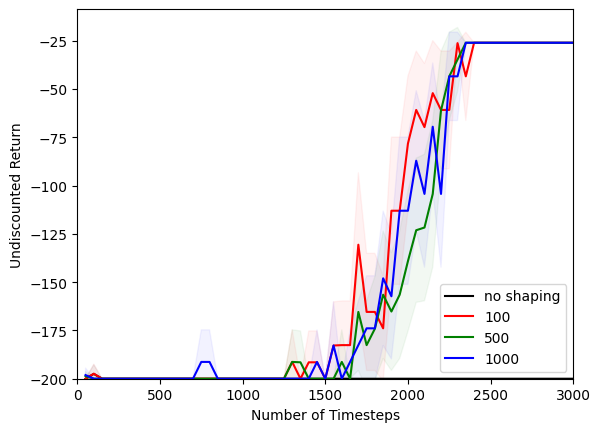

In [634]:
# baseline
x, y, name = load_setting(baseline_path, "baseline", 0, 0.0, 0.3)
plot_mean_and_conf_interval(x, y, label='no shaping', color="black", alpha=1)

n_episodes = [100, 500, 1000]
colors = ['r', 'g', 'b']

for n, c in zip(n_episodes, colors):
    x, y, name = load_fit_setting(path, "MER", n, 0, 1.0, 1.0)
    plot_mean_and_conf_interval(x, y, label=n, color=c, alpha=1)
    
plt.legend(loc='lower right')
plt.xlim([0, 3000])
plt.ylim([-200, None])
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")

Text(0, 0.5, 'Undiscounted Return')

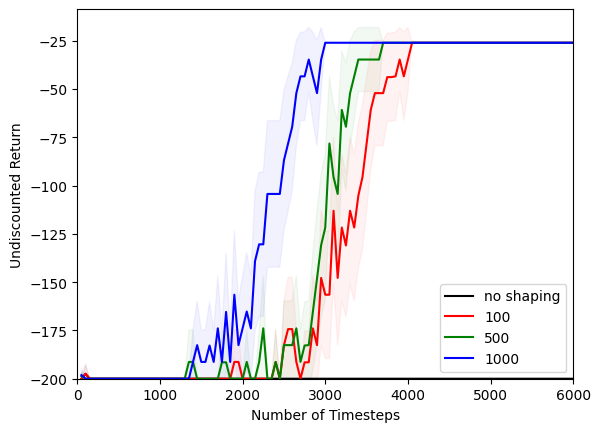

In [637]:
# baseline
x, y, name = load_setting(baseline_path, "baseline", 0, 0.0, 0.3)
plot_mean_and_conf_interval(x, y, label='no shaping', color="black", alpha=1)

n_episodes = [100, 500, 1000]
colors = ['r', 'g', 'b']



for n, c in zip(n_episodes, colors):
    if n == 100 or n == 500:
        SR_r = 0.75
    else:
        SR_r = 1.0
    x, y, name = load_fit_setting(path, "SR", n, 0, SR_r, 1.0)
    plot_mean_and_conf_interval(x, y, label=n, color=c, alpha=1)
    
plt.legend(loc='lower right')
plt.xlim([0, 6000])
plt.ylim([-200, None])
plt.xlabel("Number of Timesteps")
plt.ylabel("Undiscounted Return")